<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1">Data</a></span><ul class="toc-item"><li><span><a href="#Airline-dataset" data-toc-modified-id="Airline-dataset-1.1">Airline dataset</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-1.2">Train-test split</a></span></li><li><span><a href="#Forecasting-horizon" data-toc-modified-id="Forecasting-horizon-1.3">Forecasting horizon</a></span></li></ul></li><li><span><a href="#Forecasters" data-toc-modified-id="Forecasters-2">Forecasters</a></span><ul class="toc-item"><li><span><a href="#NaiveForecaster" data-toc-modified-id="NaiveForecaster-2.1">NaiveForecaster</a></span></li><li><span><a href="#EnsembleForecaster" data-toc-modified-id="EnsembleForecaster-2.2">EnsembleForecaster</a></span></li></ul></li></ul></div>

Evaluation of **sktime** for time series forecasting:

* [sktime](https://github.com/alan-turing-institute/sktime)
* [Sktime: a Unified Python Library for Time Series Machine Learning](https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55)

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 5)

# Data

## Airline dataset

In [9]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split

# load pandas Series data
s_data = load_airline()
s_data.describee()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Number of airline passengers, dtype: float64

## Train-test split

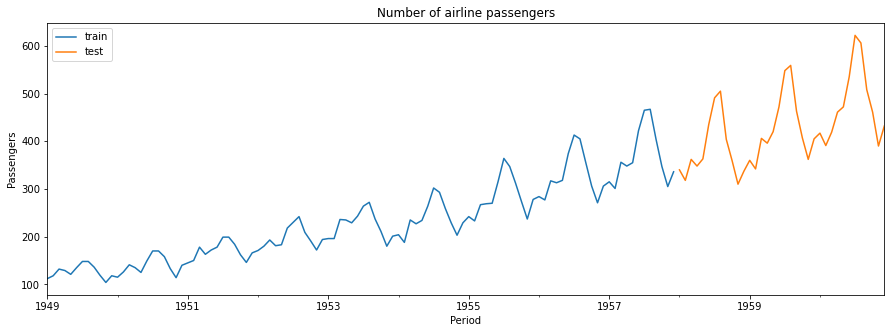

In [19]:
y_train, y_test = temporal_train_test_split(s_data)

plt.title('Number of airline passengers')
plt.ylabel('Passengers')

y_train.plot(label='train')
y_test.plot(label='test')
plt.legend();

## Forecasting horizon

In [36]:
from sktime.forecasting.base import ForecastingHorizon

horizon = ForecastingHorizon(np.arange(1, len(y_test) + 1))

# Forecasters 

## NaiveForecaster

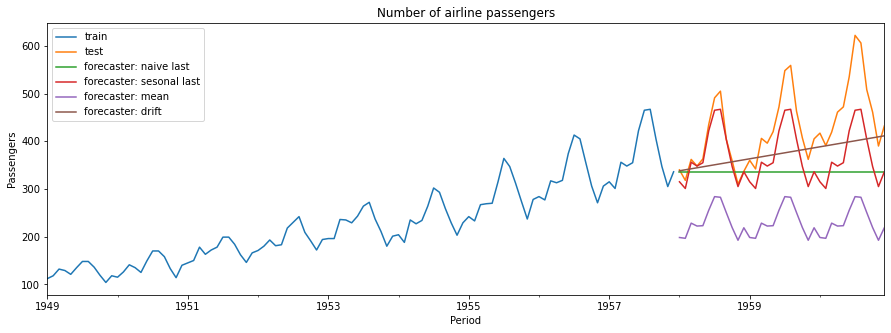

In [49]:
from sktime.forecasting.naive import NaiveForecaster

plt.title('Number of airline passengers')
plt.ylabel('Passengers')
y_train.plot(label='train')
y_test.plot(label='test')

forecasters = [('naive last', NaiveForecaster(strategy='last')),
               ('sesonal last', NaiveForecaster(strategy='last', sp=12)),
               ('mean', NaiveForecaster(strategy='mean', sp=12)),
               ('drift', NaiveForecaster(strategy='drift')),
               ]
for name, forecaster in forecasters:

    forecaster.fit(y_train)
    y_pred = forecaster.predict(horizon)
    plt.plot(y_pred, label=f'forecaster: {name}')

plt.legend();

## EnsembleForecaster

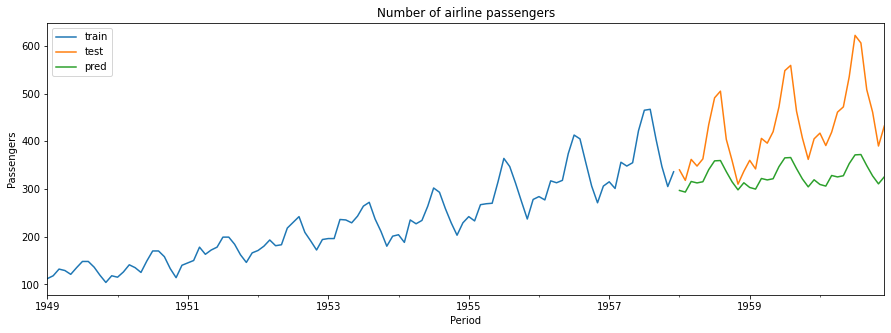

In [56]:
from sktime.forecasting.compose import EnsembleForecaster

forecaster = EnsembleForecaster(forecasters)

forecaster.fit(y_train)
y_pred = forecaster.predict(horizon)

plt.title('Number of airline passengers')
plt.ylabel('Passengers')
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='pred')
plt.legend();